<a href="https://colab.research.google.com/github/Hayko00077/AI_Projects/blob/main/Proekt_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
df = pd.read_csv('/content/train 2.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43818 entries, 0 to 43817
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        43818 non-null  object 
 1   Customer_ID               43818 non-null  object 
 2   Month                     43818 non-null  object 
 3   Name                      39459 non-null  object 
 4   Age                       43818 non-null  object 
 5   SSN                       43818 non-null  object 
 6   Occupation                43818 non-null  object 
 7   Annual_Income             43818 non-null  object 
 8   Monthly_Inhand_Salary     37270 non-null  float64
 9   Num_Bank_Accounts         43818 non-null  int64  
 10  Num_Credit_Card           43818 non-null  int64  
 11  Interest_Rate             43818 non-null  int64  
 12  Num_of_Loan               43818 non-null  object 
 13  Type_of_Loan              38872 non-null  object 
 14  Delay_

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,37270.000000,43818.000000,43818.000000,43818.000000,43818.000000,42978.000000,43817.000000,43817.000000
mean,4215.738740,16.882628,23.201059,70.922178,21.138140,26.448718,32.311347,1388.331623
std,3209.549310,116.969308,132.313651,459.980632,14.908357,184.532580,5.128180,8281.315720
min,319.556250,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1637.925000,3.000000,4.000000,8.000000,10.000000,3.000000,28.064870,30.907553
50%,3091.000000,6.000000,6.000000,13.000000,18.000000,6.000000,32.328808,69.692591
75%,5989.731667,7.000000,7.000000,20.000000,28.000000,9.000000,36.543940,162.343223
max,15136.696667,1798.000000,1499.000000,5788.000000,67.000000,2597.000000,50.000000,82256.000000


In [ ]:
print(df.isna().sum())
print(f"Number of duplicatdf['Age'] = df['Age'].astype(int)e rows: {df.duplicated().sum()}")

ID                             0
Customer_ID                    0
Month                          0
Name                        4359
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       6548
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                4946
Delay_from_due_date            0
Num_of_Delayed_Payment      3085
Changed_Credit_Limit           0
Num_Credit_Inquiries         840
Credit_Mix                     1
Outstanding_Debt               1
Credit_Utilization_Ratio       1
Credit_History_Age          3986
Payment_of_Min_Amount          1
Total_EMI_per_month            1
Amount_invested_monthly     1940
Payment_Behaviour              1
Monthly_Balance              563
Credit_Score                   1
dtype: int64
Number of duplicatdf['Age'] = df['Age'].astype(int)e rows: 0


In [ ]:
df['Age'].isna().sum()

np.int64(0)

In [ ]:
df['Age'] = df['Age'].astype(str).str.replace(r'[^0-9.-]', '', regex=True).str.strip()
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
median_age = df[(df['Age'] >= 18) & (df['Age'] <= 80)]['Age'].median()
df['Age'] = df['Age'].apply(lambda x: median_age if pd.isna(x) or x < 18 or x > 80 else x)
df['Age'] = df['Age'].astype(int)

print("Age dtype:", df['Age'].dtype)
print("Min Age:", df['Age'].min())
print("Max Age:", df['Age'].max())


Age dtype: int64
Min Age: 18
Max Age: 56


In [ ]:
df['Annual_Income'] = df['Annual_Income'].astype(str).str.replace(r'[^0-9.-]', '', regex=True).str.strip()
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')

df['Monthly_Inhand_Salary'] = df.apply(
    lambda row: row['Annual_Income'] / 12 if pd.isna(row['Monthly_Inhand_Salary']) else row['Monthly_Inhand_Salary'],
    axis=1
)
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].astype(int)
print(df['Monthly_Inhand_Salary'].head(10))
print("NaNs after correction:", df['Monthly_Inhand_Salary'].isna().sum())


0    1824
1    1592
2    1592
3    1592
4    1824
5    1592
6    1824
7    1824
8    3037
9    3037
Name: Monthly_Inhand_Salary, dtype: int64
NaNs after correction: 0


In [ ]:
# Remove non-numeric characters and convert to numeric
df['Num_of_Delayed_Payment'] = (
    df['Num_of_Delayed_Payment']
    .astype(str)
    .str.replace(r'[^0-9.-]', '', regex=True)  # remove unwanted chars
    .str.strip()
)

# Convert to numbers (invalid ones become NaN)
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

# Fill missing values with the median
median_Delayed_Payment = df['Num_of_Delayed_Payment'].median()
df['Num_of_Delayed_Payment'].fillna(median_Delayed_Payment, inplace=True)

# Convert to int (now safe)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(int)


/tmp/ipython-input-1822713845.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Num_of_Delayed_Payment'].fillna(median_Delayed_Payment, inplace=True)


In [ ]:
# Convert '22 Years 3 Months' → 267 months
import numpy as np

def parse_credit_history_age(x):
    if pd.isna(x):
        return np.nan
    years = months = 0
    parts = x.split()
    if 'Year' in x:
        years = int(parts[0])
    if 'Month' in x:
        months = int(parts[-2]) if len(parts) > 2 else 0
    return years * 12 + months

# Apply conversion
df['Credit_History_Age'] = df['Credit_History_Age'].apply(parse_credit_history_age)

# Fill missing with median
median_value = df['Credit_History_Age'].median()
df['Credit_History_Age'].fillna(median_value, inplace=True)

/tmp/ipython-input-1466114687.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History_Age'].fillna(median_value, inplace=True)


In [ ]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
median_Monthly_Balance = df['Monthly_Balance'].median()
df['Monthly_Balance'].fillna(median_Monthly_Balance, inplace=True)

/tmp/ipython-input-2785905445.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Monthly_Balance'].fillna(median_Monthly_Balance, inplace=True)


In [ ]:
if df['Type_of_Loan'].notna().any():
    # If at least one non-NaN value exists
    mode_value = df['Type_of_Loan'].mode()[0]
else:
    # If all values are NaN, set a default
    mode_value = 0  # or any other default value you want"

df['Type_of_Loan'].fillna(mode_value, inplace=True)
df['Type_of_Loan'].isna().sum()


/tmp/ipython-input-1227403240.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type_of_Loan'].fillna(mode_value, inplace=True)


np.int64(0)

In [ ]:
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype(str).str.replace(r'[^0-9.-]', '', regex=True).str.strip()
df['Num_Credit_Inquiries'] = pd.to_numeric(df['Num_Credit_Inquiries'], errors='coerce')
median_Credit_Inquiries = df['Num_Credit_Inquiries'].median()
df['Num_Credit_Inquiries'].fillna(median_Credit_Inquiries, inplace=True)

/tmp/ipython-input-1705453451.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Num_Credit_Inquiries'].fillna(median_Credit_Inquiries, inplace=True)


In [ ]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(str).str.replace(r'[^0-9.-]', '', regex=True).str.strip()
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
median_Amount_invested_monthly = df['Amount_invested_monthly'].median()
df['Amount_invested_monthly'].fillna(median_Amount_invested_monthly, inplace=True)

/tmp/ipython-input-3077167188.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount_invested_monthly'].fillna(median_Amount_invested_monthly, inplace=True)


In [ ]:
df.drop(columns=['Customer_ID'], inplace=True)
df.drop(columns=['Name'], inplace=True)


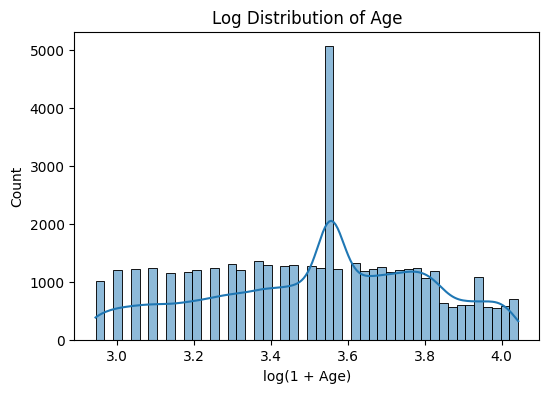

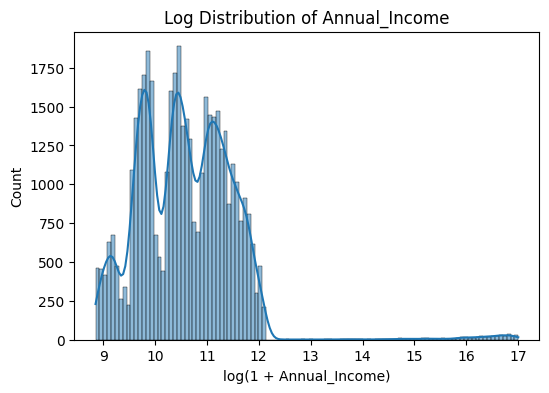

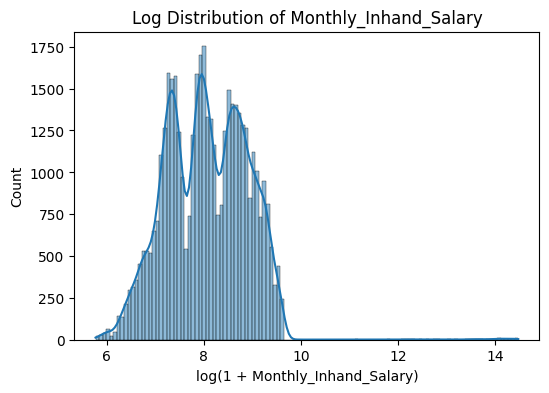

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


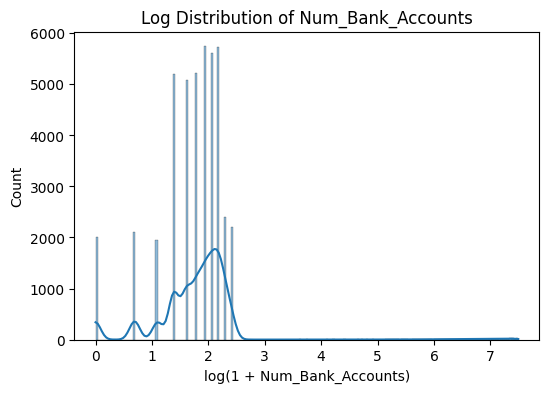

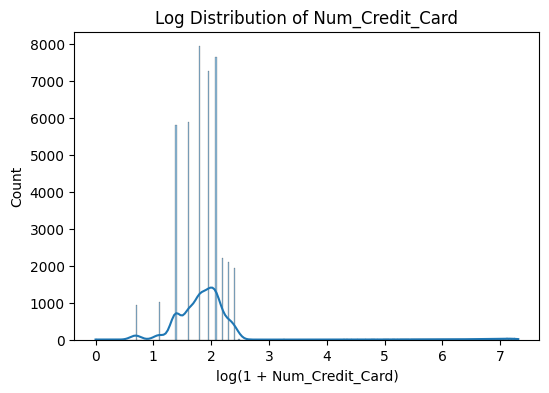

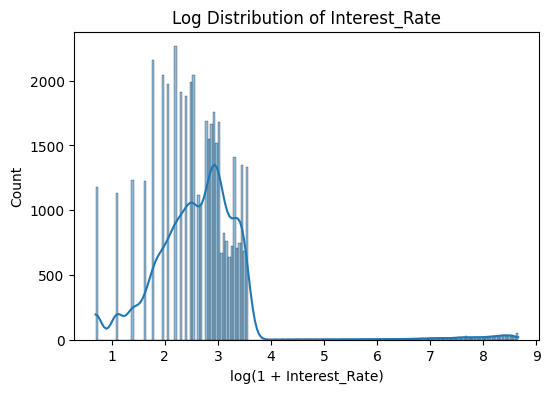

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


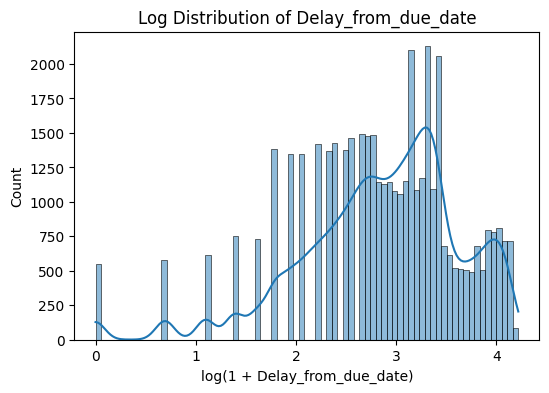

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


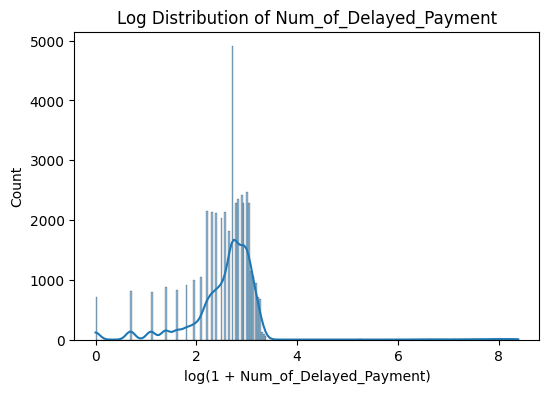

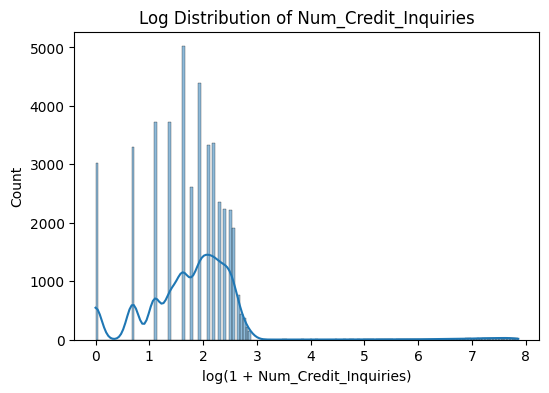

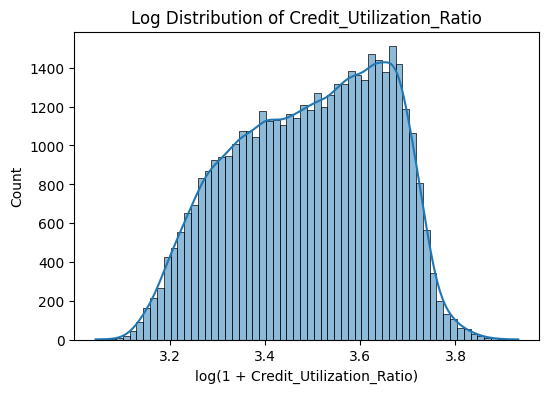

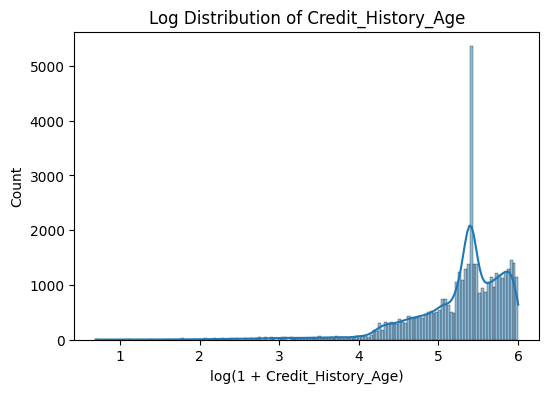

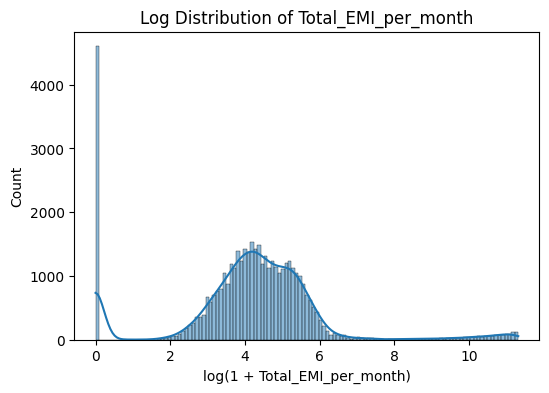

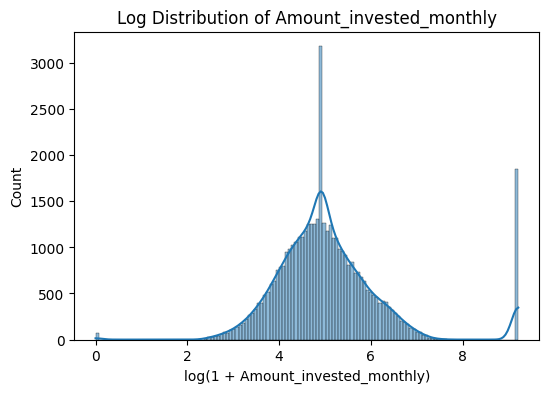

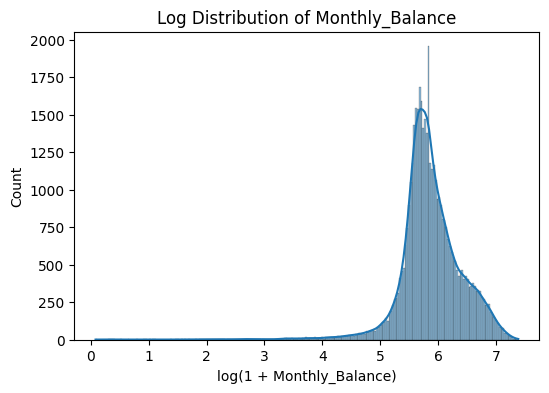

In [ ]:

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(np.log1p(df[col]), kde=True)
    plt.title(f'Log Distribution of {col}')
    plt.xlabel(f'log(1 + {col})')
    plt.show()


In [ ]:
print(df.isna().sum())


ID                          0
Month                       0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  1
Outstanding_Debt            1
Credit_Utilization_Ratio    1
Credit_History_Age          0
Payment_of_Min_Amount       1
Total_EMI_per_month         1
Amount_invested_monthly     0
Payment_Behaviour           1
Monthly_Balance             0
Credit_Score                1
dtype: int64


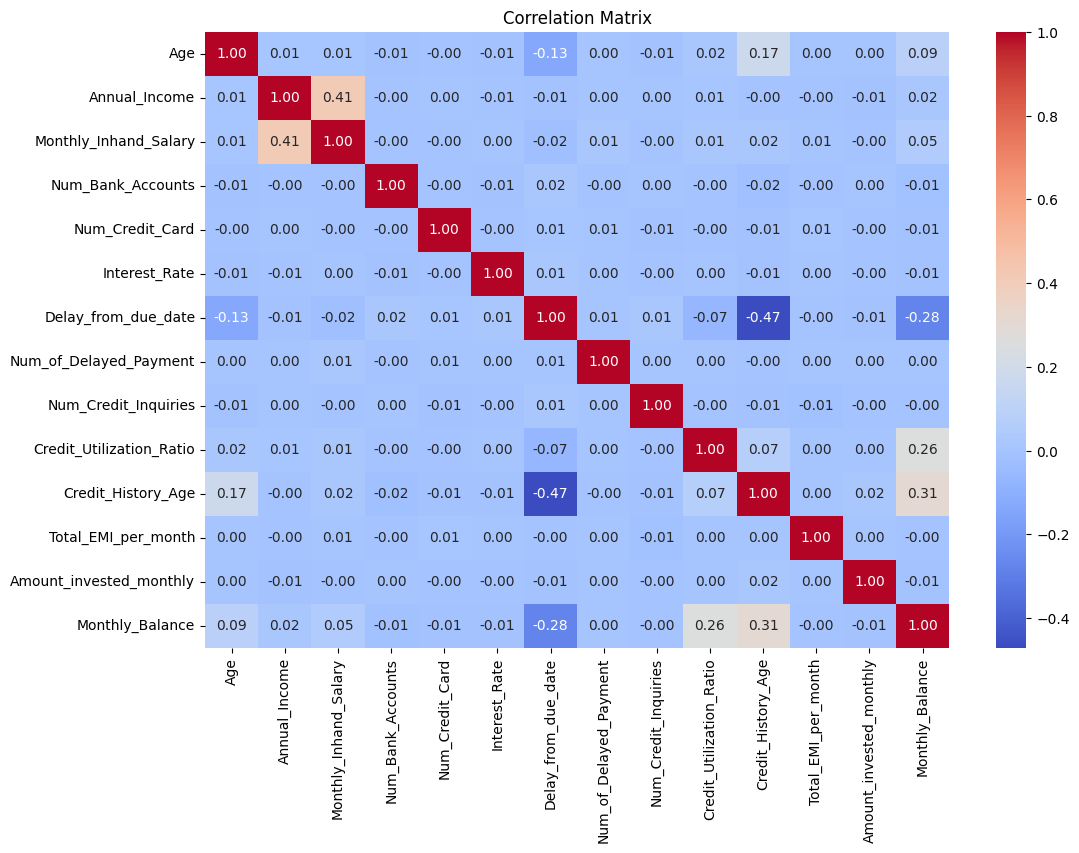

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Suppose your column is 'Credit_Score'
df = pd.get_dummies(df, columns=['Credit_Score'], drop_first=False)

df.head()

,ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score_Good,Credit_Score_Poor,Credit_Score_Standard
0,0x1602,January,23,821-00-0265,Scientist,19114.12,1824,3,4,3,...,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,True,False,False
1,0x1603,February,23,821-00-0265,Scientist,19114.12,1592,3,4,3,...,31.944960,220.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,True,False,False
2,0x1604,March,34,821-00-0265,Scientist,19114.12,1592,3,4,3,...,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,True,False,False
3,0x1605,April,23,821-00-0265,Scientist,19114.12,1592,3,4,3,...,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,True,False,False
4,0x1606,May,23,821-00-0265,Scientist,19114.12,1824,3,4,3,...,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,True,False,False


              precision    recall  f1-score   support

        Good       0.79      0.72      0.75      1646
        Poor       0.79      0.80      0.80      2578
    Standard       0.80      0.82      0.81      4540

    accuracy                           0.80      8764
   macro avg       0.79      0.78      0.79      8764
weighted avg       0.80      0.80      0.79      8764



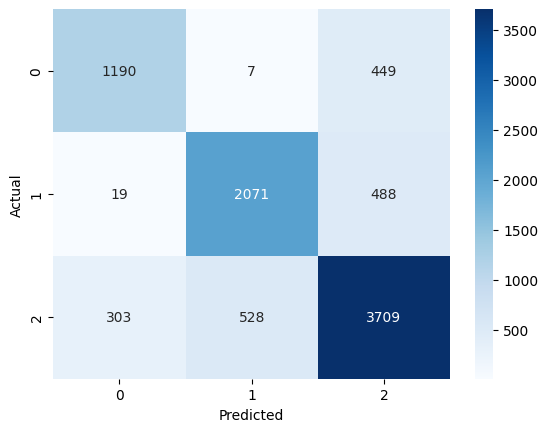

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a new column 'Credit_Score_Target' based on 'Credit_Score'
df['Credit_Score_Target'] = np.select(
    [
        df['Credit_Score_Good'] == 1,
        df['Credit_Score_Poor'] == 1,
        df['Credit_Score_Standard'] == 1
    ],
    ['Good', 'Poor', 'Standard'],
    default='Unknown'
)

# Now drop ID and the one-hot columns
X = df.drop(columns=['ID', 'Credit_Score_Good', 'Credit_Score_Poor', 'Credit_Score_Standard', 'Credit_Score_Target'])
y = df['Credit_Score_Target']

categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Օրինակ, նոր տվյալներ
new_data_good = pd.DataFrame([
    {
        'Month': 'Jan',
        'Age': 30,
        'Occupation': 'Engineer',
        'Annual_Income': 80000,
        'Monthly_Inhand_Salary': 6000,
        'Num_Bank_Accounts': 3,
        'Num_Credit_Card': 2,
        'Interest_Rate': 10,
        'Num_of_Loan': 0,
        'Type_of_Loan': 'Home Loan',
        'Delay_from_due_date': 0,
        'Num_of_Delayed_Payment': 0,
        'Changed_Credit_Limit': 0,
        'Num_Credit_Inquiries': 0,
        'Credit_Mix': 'Good',
        'Outstanding_Debt': 500,
        'Credit_Utilization_Ratio': 0.1,
        'Credit_History_Age': 150,
        'Payment_of_Min_Amount': 'Yes',
        'Total_EMI_per_month': 100,
        'Amount_invested_monthly': 500,
        'Payment_Behaviour': 'Regular',
        'Monthly_Balance': 10000
    }
])



categorical_cols = ['Month','Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']
new_data_encoded = pd.get_dummies(new_data_good, columns=categorical_cols, drop_first=True)

missing_cols = [col for col in X_train.columns if col not in new_data_encoded.columns]
if missing_cols:
    zeros = pd.DataFrame(0, index=new_data_encoded.index, columns=missing_cols)
    new_data_encoded = pd.concat([new_data_encoded, zeros], axis=1)

new_data_encoded = new_data_encoded[X_train.columns]

prediction = rf.predict(new_data_encoded)
prediction_proba = rf.predict_proba(new_data_encoded)

print("Predicted Credit Score:", prediction)
print("Prediction Probabilities:", prediction_proba)


Predicted Credit Score: ['Standard']
Prediction Probabilities: [[0.38 0.12 0.5  0.  ]]
